In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from keras.optimizers import Adam
from keras.optimizers.experimental import Nadam, SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

2024-01-27 18:03:53.414554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 18:03:53.414588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 18:03:53.452061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 18:03:53.534417: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 18:03:54.276151: W tensorflow/compiler/tf2

In [2]:
input_folder = './ASL_unique/'
output_folder = './sorted_VGG16unique4k'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2), group_prefix=None)


target_size = (200, 200)


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    output_folder + '/train',
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    output_folder + '/val',
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)


Copying files: 31852 files [00:00, 35724.06 files/s]


Found 25442 images belonging to 8 classes.
Found 6365 images belonging to 8 classes.


In [3]:
input_folder = './ASL_test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    input_folder,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 7200 images belonging to 8 classes.


2024-01-27 18:03:58.484188: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 18:03:58.608332: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 18:03:58.608370: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 18:03:58.610048: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 18:03:58.610079: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                        

2024-01-27 18:04:00.209744: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-27 18:04:02.400700: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f91e91539a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-27 18:04:02.400722: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
I0000 00:00:1706375042.440089   82588 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


796/796 [==============================] - 230s 264ms/step - loss: 0.6252 - accuracy: 0.7774 - val_loss: 0.0872 - val_accuracy: 0.9755
Epoch 2/25
796/796 [==============================] - 203s 254ms/step - loss: 0.1031 - accuracy: 0.9675 - val_loss: 0.0342 - val_accuracy: 0.9904
Epoch 3/25
796/796 [==============================] - 208s 262ms/step - loss: 0.0508 - accuracy: 0.9829 - val_loss: 0.0212 - val_accuracy: 0.9940
Epoch 4/25
796/796 [==============================] - 208s 261ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 5/25
796/796 [==============================] - 200s 251ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0093 - val_accuracy: 0.9976
Epoch 6/25
796/796 [==============================] - 199s 250ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0137 - val_accuracy: 0.9961
Epoch 7/25
796/796 [==============================] - 207s 261ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0185 - val_accura

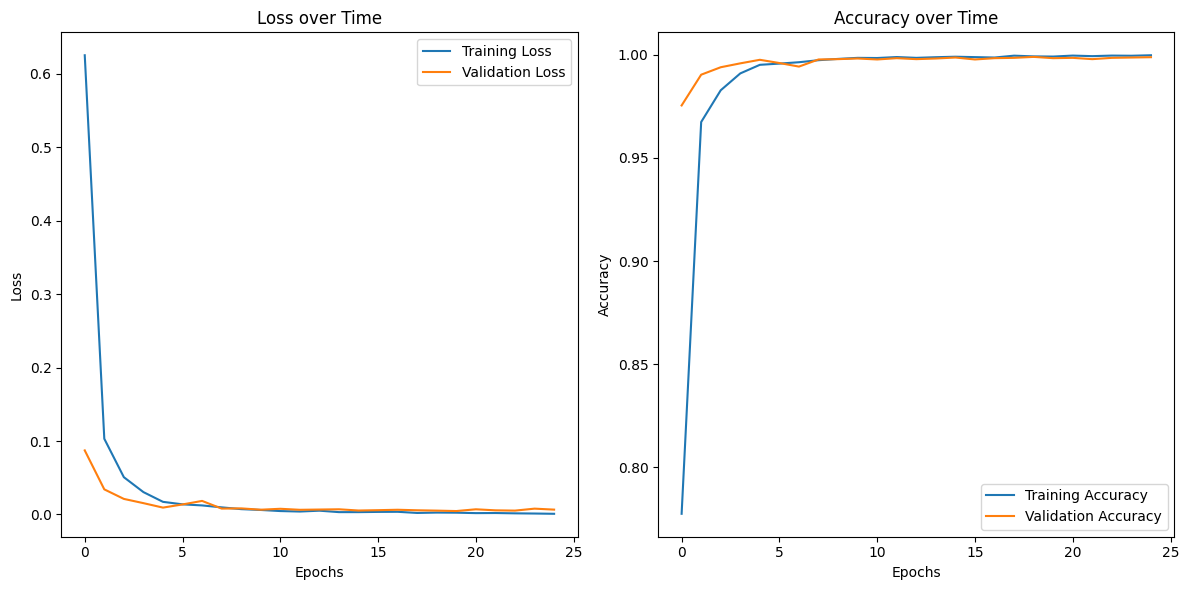

225/225 [==============================] - 39s 174ms/step - loss: 1.8937 - accuracy: 0.6875
Test Loss: 1.8937
Test Accuracy: 68.75%


In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Schritt 4: Fügen Sie dem VGG16-Modell einen benutzerdefinierten Klassifikator hinzu
model = models.Sequential()
model.add(vgg_model)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))  # Ändern Sie dies entsprechend der Anzahl Ihrer Klassen

# Schritt 5: Kompilieren Sie das Modell
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator, epochs=25, validation_data=val_generator)
# Schritt 7: Bewerten Sie das Modell auf dem Testset
# Plot Loss über die Zeit
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy über die Zeit
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show() 
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [5]:
save_directory = './Result'
os.makedirs(save_directory, exist_ok=True)

for _ in range(1):
    predictions = model.predict(test_generator)
    true_labels = test_generator.classes 
    incorrect_indices = np.where(np.argmax(predictions, axis=1) != true_labels)[0]

    num_samples_to_display = 5
    for i in range(min(num_samples_to_display, len(incorrect_indices))):
        batch_index = incorrect_indices[i] // test_generator.batch_size
        in_batch_index = incorrect_indices[i] % test_generator.batch_size

        image = test_generator[batch_index][0][in_batch_index]
        true_label = true_labels[incorrect_indices[i]]
        predicted_label = np.argmax(predictions[incorrect_indices[i]])

        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')

        image_filename = f'incorrect_image_{i+1}_true_{true_label}_pred_{predicted_label}.png'
        image_path = os.path.join(save_directory, image_filename)
        plt.savefig(image_path)

        plt.close()

225/225 [==============================] - 35s 155ms/step


In [6]:
print("Class indices in test_generator:", test_generator.class_indices)


Class indices in test_generator: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}


In [7]:
print(true_labels[200:])  # Gib die ersten 10 wahren Labels aus

[0 0 0 ... 7 7 7]


In [8]:
print("Shape of test_generator.labels:", test_generator.labels.shape)
print("Sample labels from test_generator:", test_generator.labels[:5])

Shape of test_generator.labels: (7200,)
Sample labels from test_generator: [0 0 0 0 0]
